In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import ast
from textblob import TextBlob
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

df_ted_main = pd.read_csv("data/ted_main.csv")
df_ted_transcripts = df = pd.read_csv("data/transcripts.csv")

In [100]:
############### PREPROCESSING OF THE DATA ###############
# - removing columns that are not needed
# - one hot encoding columns
# - adding sentiment analysis of transcripts 
# - combining columns together to create a new structure of the data frame

In [101]:
# ----------------------------------------------------------
# 1. remove unwanted columns
# ----------------------------------------------------------

df_ted_main.drop(['description', 'film_date', 'main_speaker', 'name', 'num_speaker', 'related_talks', 'speaker_occupation', 'title', 'url'], axis=1, inplace=True)
df_ted_main.head()

,comments,duration,event,languages,published_date,ratings,tags,views
0,4553,1164,TED2006,60,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","['children', 'creativity', 'culture', 'dance',...",47227110
1,265,977,TED2006,43,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","['alternative energy', 'cars', 'climate change...",3200520
2,124,1286,TED2006,26,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","['computers', 'entertainment', 'interface desi...",1636292
3,200,1116,TED2006,35,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","['MacArthur grant', 'activism', 'business', 'c...",1697550
4,593,1190,TED2006,48,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","['Africa', 'Asia', 'Google', 'demo', 'economic...",12005869


In [102]:
# ----------------------------------------------------------
# 2. one hot encoding
# ----------------------------------------------------------

# one hot encoding tags

# iterate trough the data set
for i, row in df_ted_main.iterrows():
    # change string formed list into normal list
    element_list_form = ast.literal_eval(df_ted_main.at[i,'tags'])
    element_list_form = [i.strip() for i in element_list_form]
    # finish converting by replacing string version of a list for the list type
    df_ted_main.at[i,'tags'] = element_list_form

# one hot encoding with column named "tags"
# since "tags" is a Series on each row, we need to split them first and then we can do one hot encoding
df_ted_main = df_ted_main.drop('tags', 1).join(
    pd.get_dummies(
        pd.DataFrame(df_ted_main.tags.tolist()).stack()
    ).astype(int).sum(level=0)
)

df_ted_main.head()

,comments,duration,event,languages,published_date,ratings,views,3d printing,AI,AIDS,...,wikipedia,wind energy,women,women in business,work,work-life balance,world cultures,writing,wunderkind,youth
0,4553,1164,TED2006,60,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",47227110,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,265,977,TED2006,43,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",3200520,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,124,1286,TED2006,26,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",1636292,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,200,1116,TED2006,35,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",1697550,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,593,1190,TED2006,48,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",12005869,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
# one hot encoding "event" column

def one_hot_encode(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

df_ted_main = one_hot_encode(df_ted_main, 'event')
df_ted_main.head()

,comments,duration,languages,published_date,ratings,views,3d printing,AI,AIDS,Addiction,...,event_TEDxZurich,event_TEDxZurich 2011,event_TEDxZurich 2012,event_TEDxZurich 2013,event_Taste3 2008,event_The Do Lectures,event_Toronto Youth Corps,event_University of California,event_Web 2.0 Expo 2008,event_World Science Festival
0,4553,1164,60,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",47227110,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,265,977,43,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",3200520,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,124,1286,26,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",1636292,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,200,1116,35,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",1697550,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,593,1190,48,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",12005869,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
#rating analysis

df_ted_main['ratings']=df_ted_main['ratings'].str.replace("'",'"')

df_ted_main=df_ted_main.merge(df_ted_main.ratings.apply(lambda x: pd.Series(pd.read_json(x)['count'].values,index=pd.read_json(x)['name'])), 
            left_index=True, right_index=True)

df_ted_main.drop('ratings', axis=1, inplace=True)

df_ted_main.head()

,comments,duration,languages,published_date,views,3d printing,AI,AIDS,Addiction,Africa,...,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
0,4553,1164,60,1151367060,47227110,0,0,0,0,0,...,387,242,7346,10581,300,10704,4439,1174,209,24924
1,265,977,43,1151367060,3200520,0,0,0,0,0,...,113,62,443,132,258,268,116,203,131,413
2,124,1286,26,1151367060,1636292,0,0,0,0,0,...,78,27,395,166,104,230,54,146,142,230
3,200,1116,35,1151367060,1697550,0,0,0,0,0,...,53,32,380,132,36,460,230,85,35,1070
4,593,1190,48,1151440680,12005869,0,0,0,0,1,...,110,72,5433,4606,67,2542,3736,248,61,2893


In [105]:
# sentiment analysis of transcript
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df_ted_transcripts['polarity'] = df_ted_transcripts['transcript'].apply(pol)
df_ted_transcripts['subjectivity'] = df_ted_transcripts['transcript'].apply(sub)
df_ted_transcripts

,transcript,url,polarity,subjectivity
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...,0.146452,0.462051
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...,0.157775,0.424101
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...,0.136579,0.475229
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...,0.082928,0.439165
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...,0.096483,0.450631
...,...,...,...,...
2462,"So, Ma was trying to explain something to me a...",https://www.ted.com/talks/duarte_geraldino_wha...,0.038878,0.352668
2463,This is a picture of a sunset on Mars taken by...,https://www.ted.com/talks/armando_azua_bustos_...,0.127087,0.538377
2464,"In my early days as a graduate student, I went...",https://www.ted.com/talks/radhika_nagpal_what_...,0.193538,0.526466
2465,I took a cell phone and accidentally made myse...,https://www.ted.com/talks/theo_e_j_wilson_a_bl...,0.100929,0.498050


In [106]:
# merging both datasets and delete the rows that don't have a transcipt
result = pd.merge(df_ted_main, df_ted_transcripts, left_index=True, right_index=True)

In [107]:
result

,comments,duration,languages,published_date,views,3d printing,AI,AIDS,Addiction,Africa,...,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,transcript,url,polarity,subjectivity
0,4553,1164,60,1151367060,47227110,0,0,0,0,0,...,300,10704,4439,1174,209,24924,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...,0.146452,0.462051
1,265,977,43,1151367060,3200520,0,0,0,0,0,...,258,268,116,203,131,413,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...,0.157775,0.424101
2,124,1286,26,1151367060,1636292,0,0,0,0,0,...,104,230,54,146,142,230,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...,0.136579,0.475229
3,200,1116,35,1151367060,1697550,0,0,0,0,0,...,36,460,230,85,35,1070,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...,0.082928,0.439165
4,593,1190,48,1151440680,12005869,0,0,0,0,1,...,67,2542,3736,248,61,2893,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...,0.096483,0.450631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,35,920,20,1496156399,1079698,0,1,0,0,0,...,9,103,11,26,4,258,"So, Ma was trying to explain something to me a...",https://www.ted.com/talks/duarte_geraldino_wha...,0.038878,0.352668
2463,34,452,17,1496242092,957803,0,0,0,0,0,...,11,74,21,30,4,185,This is a picture of a sunset on Mars taken by...,https://www.ted.com/talks/armando_azua_bustos_...,0.127087,0.538377
2464,18,1230,14,1496327443,874817,0,0,0,0,1,...,0,55,10,22,3,196,"In my early days as a graduate student, I went...",https://www.ted.com/talks/radhika_nagpal_what_...,0.193538,0.526466
2465,10,885,8,1496400857,946815,0,0,0,0,0,...,0,9,24,0,9,63,I took a cell phone and accidentally made myse...,https://www.ted.com/talks/theo_e_j_wilson_a_bl...,0.100929,0.498050


In [108]:
# deleting the transcript and url columns because we don't need them.
del result['transcript']
del result['url']

In [109]:
result

,comments,duration,languages,published_date,views,3d printing,AI,AIDS,Addiction,Africa,...,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,polarity,subjectivity
0,4553,1164,60,1151367060,47227110,0,0,0,0,0,...,7346,10581,300,10704,4439,1174,209,24924,0.146452,0.462051
1,265,977,43,1151367060,3200520,0,0,0,0,0,...,443,132,258,268,116,203,131,413,0.157775,0.424101
2,124,1286,26,1151367060,1636292,0,0,0,0,0,...,395,166,104,230,54,146,142,230,0.136579,0.475229
3,200,1116,35,1151367060,1697550,0,0,0,0,0,...,380,132,36,460,230,85,35,1070,0.082928,0.439165
4,593,1190,48,1151440680,12005869,0,0,0,0,1,...,5433,4606,67,2542,3736,248,61,2893,0.096483,0.450631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,35,920,20,1496156399,1079698,0,1,0,0,0,...,88,120,9,103,11,26,4,258,0.038878,0.352668
2463,34,452,17,1496242092,957803,0,0,0,0,0,...,50,22,11,74,21,30,4,185,0.127087,0.538377
2464,18,1230,14,1496327443,874817,0,0,0,0,1,...,49,38,0,55,10,22,3,196,0.193538,0.526466
2465,10,885,8,1496400857,946815,0,0,0,0,0,...,13,43,0,9,24,0,9,63,0.100929,0.498050


In [110]:
# Pandas describe() is used to view some basic statistical details like percentile, mean, std etc.
# of a data frame or a series of numeric values.
result.describe()

,comments,duration,languages,published_date,views,3d printing,AI,AIDS,Addiction,Africa,...,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,polarity,subjectivity
count,2467.000000,2467.000000,2467.000000,2.467000e+03,2.467000e+03,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,...,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000
mean,197.134576,829.147548,27.957844,1.338192e+09,1.724277e+06,0.001216,0.014187,0.006486,0.001621,0.039724,...,356.396028,322.543575,54.271990,225.788002,152.490474,83.605999,26.760843,543.645724,0.123911,0.464265
std,285.333894,377.874229,8.999766,9.156275e+07,2.534605e+06,0.034858,0.118286,0.080288,0.040242,0.195350,...,546.919139,633.131476,92.807461,473.312491,562.578622,90.856939,54.164400,1333.838520,0.056033,0.058011
min,5.000000,135.000000,0.000000,1.151367e+09,5.044300e+04,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,-0.183942,0.000000
25%,68.000000,576.000000,23.000000,1.266321e+09,7.641575e+05,0.000000,0.000000,0.000000,0.000000,0.000000,...,105.000000,83.000000,12.000000,39.000000,19.000000,34.000000,6.000000,117.000000,0.090815,0.432490
50%,123.000000,854.000000,28.000000,1.337182e+09,1.136037e+06,0.000000,0.000000,0.000000,0.000000,0.000000,...,219.000000,168.000000,28.000000,100.000000,44.000000,58.000000,13.000000,241.000000,0.123564,0.464179
75%,226.000000,1054.000000,33.000000,1.414293e+09,1.727858e+06,0.000000,0.000000,0.000000,0.000000,0.000000,...,411.000000,354.500000,61.000000,233.500000,116.000000,101.000000,28.000000,508.000000,0.156340,0.496142
max,6404.000000,5256.000000,72.000000,1.496418e+09,4.722711e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,9787.000000,14447.000000,2194.000000,10704.000000,14728.000000,1341.000000,1361.000000,24924.000000,0.594444,0.777778


In [135]:
ted_train, ted_test = train_test_split(result, test_size=0.20, random_state=42, shuffle = True)

In [136]:
ted_train

,comments,duration,languages,published_date,views,3d printing,AI,AIDS,Addiction,Africa,...,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,polarity,subjectivity
1124,65,796,32,1327680405,548121,0,0,0,0,0,...,90,50,16,176,25,27,7,400,0.113159,0.475697
856,132,402,38,1296054720,1300622,0,0,0,0,0,...,66,64,71,110,14,177,11,462,0.216923,0.475159
1807,283,412,32,1408979290,1219295,0,0,0,0,0,...,257,142,68,133,10,137,11,150,0.163524,0.408581
219,145,1372,34,1208839080,2477746,0,0,0,0,0,...,304,444,148,106,59,298,43,752,0.179368,0.512544
445,266,1049,32,1241991240,1985679,0,0,0,0,0,...,379,393,105,810,115,153,39,1604,0.120538,0.472721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,253,857,29,1386345659,871452,0,0,0,0,0,...,202,135,58,302,30,31,14,396,0.140252,0.546139
1095,363,1122,32,1324310558,1692225,0,0,0,0,0,...,740,605,89,180,68,120,22,201,0.126225,0.437179
1130,63,683,27,1328200107,318110,0,0,0,0,0,...,105,42,15,44,10,27,3,83,0.069553,0.470473
1294,67,848,21,1342969159,585351,0,0,0,0,0,...,55,83,8,33,43,7,0,158,0.119079,0.285212


In [141]:
ted_test

,comments,duration,languages,published_date,views,3d printing,AI,AIDS,Addiction,Africa,...,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,polarity,subjectivity
1711,170,599,32,1396277332,3133189,0,0,0,0,0,...,234,125,46,81,45,107,31,683,0.115239,0.445354
1557,162,644,31,1375196581,1062701,0,0,0,0,0,...,44,61,3,65,50,9,0,421,0.144387,0.518782
1870,103,995,28,1416844254,1454878,0,0,0,0,0,...,647,550,18,187,38,26,20,524,0.184918,0.503299
1703,215,971,30,1395328441,760225,0,0,0,0,0,...,274,39,31,179,79,70,10,200,0.147244,0.492855
1857,74,586,33,1415204448,2230481,0,0,0,0,0,...,273,152,46,200,8,218,7,783,0.083442,0.489400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,351,470,48,1311952186,5402228,0,0,0,0,0,...,2027,984,132,1219,83,532,74,2334,0.085244,0.474896
168,604,914,44,1197504780,8360707,0,0,0,0,0,...,340,3710,84,128,7196,314,151,817,0.101238,0.473938
926,149,594,32,1304362260,820976,0,0,0,0,0,...,24,26,25,30,37,20,13,385,0.084848,0.509120
1056,104,470,37,1320766364,777463,0,0,0,0,0,...,38,407,7,11,85,48,5,248,0.119741,0.395972


In [138]:
result["views"] = pd.cut(result["views"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [139]:
result["views"].value_counts()

5    2467
4       0
3       0
2       0
1       0
Name: views, dtype: int64

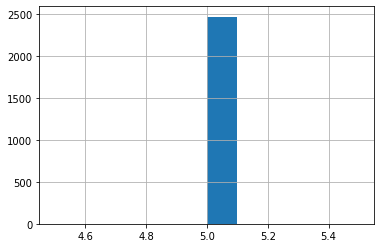

In [143]:
result["views"].hist()

In [146]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(result, result["views"]):
    strat_train_set = result.loc[train_index]
    strat_test_set = result.loc[test_index]

In [148]:
strat_test_set["views"].value_counts() / len(strat_test_set)

5    1.0
4    0.0
3    0.0
2    0.0
1    0.0
Name: views, dtype: float64

In [13]:
# std stands for Standard deviation. The Standard Deviation is a measure of how spread out numbers are.

In [53]:
# Standardization
scaler_stand = StandardScaler() 
data_scaled_stand = scaler_stand.fit_transform(result)

In [54]:
# print the mean of the scaled data.
print(data_scaled_stand.mean(axis=0))

[ 0.00000000e+00  2.30415155e-17  1.00806631e-16 -5.52996373e-16
  4.03226522e-17  2.16014208e-18  2.30415155e-17  2.16014208e-17
  8.64056833e-18  1.58410419e-17  0.00000000e+00 -3.02419892e-17
 -2.88018944e-17 -3.45622733e-17  0.00000000e+00  1.15207578e-17
 -1.00806631e-17  1.08007104e-17  3.88825575e-17  5.76037889e-18
  5.76037889e-18 -4.89632205e-17  1.29608525e-17 -1.15207578e-17
  2.88018944e-18  2.30415155e-17  2.30415155e-17 -2.30415155e-17
  5.76037889e-18 -1.44009472e-17  9.36061569e-18  2.88018944e-18
  8.64056833e-18  2.88018944e-17 -4.60830311e-17  9.36061569e-18
 -1.00806631e-17  0.00000000e+00 -1.72811367e-17  2.30415155e-17
 -3.45622733e-17 -4.32028417e-18 -4.89632205e-17  1.44009472e-17
  1.72811367e-17 -1.15207578e-17 -5.76037889e-18  2.37615629e-17
 -2.01613261e-17  1.00806631e-17  1.44009472e-17 -5.76037889e-18
 -1.94412787e-17 -5.18434100e-17  2.30415155e-17  1.72811367e-17
  5.76037889e-18 -2.30415155e-17  2.59217050e-17  1.72811367e-17
  1.44009472e-17  1.00806

In [55]:
# print the std of the scaled data
print(data_scaled_stand.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [56]:
# print the min value
print(data_scaled_stand.min(axis=0))

[-0.67350404 -1.83735281 -3.10713761 -2.04081774 -0.66052647 -0.03489316
 -0.11996436 -0.08079572 -0.04029933 -0.20339043 -0.04937644 -0.07278374
 -0.10320549 -0.06051044 -0.09485755 -0.06692404 -0.03489316 -0.06379658
 -0.05334349 -0.04029933 -0.04506517 -0.06051044 -0.13318887 -0.05334349
 -0.07554666 -0.08573178 -0.05703819 -0.11821386 -0.04937644 -0.07821416
 -0.06379658 -0.04937644 -0.04937644 -0.05703819 -0.18424991 -0.04506517
 -0.06051044 -0.07554666 -0.07278374 -0.06692404 -0.11463718 -0.02848436
 -0.09265768 -0.06991412 -0.05703819 -0.03489316 -0.06379658 -0.10519303
 -0.09485755 -0.06379658 -0.06991412 -0.06379658 -0.07278374 -0.09265768
 -0.05703819 -0.08079572 -0.14235407 -0.24248357 -0.10519303 -0.04029933
 -0.05703819 -0.06379658 -0.08079572 -0.07821416 -0.09911603 -0.46009737
 -0.05334349 -0.10118058 -0.06991412 -0.25443837 -0.139361   -0.06379658
 -0.12837933 -0.11821386 -0.05334349 -0.1128086  -0.12339505 -0.09040616
 -0.21396755 -0.08079572 -0.09700929 -0.03489316 -0

In [57]:
# print the max value
print(data_scaled_stand.max(axis=0))

[21.7574004  11.71752293  4.89469228  1.72841088 17.95627584 28.65891368
  8.33580916 12.37689379 24.81431039  4.91665225 20.25257185 13.73933153
  9.68940738 16.52607367 10.5421233  14.94231332 28.65891368 15.67482057
 18.74642823 24.81431039 22.19008788 16.52607367  7.50813512 18.74642823
 13.23685332 11.66428547 17.53211339  8.45924486 20.25257185 12.78540835
 15.67482057 20.25257185 20.25257185 17.53211339  5.427411   22.19008788
 16.52607367 13.23685332 13.73933153 14.94231332  8.72317316 35.10697936
 10.79241356 14.30326303 17.53211339 28.65891368 15.67482057  9.50633317
 10.5421233  15.67482057 14.30326303 15.67482057 13.73933153 10.79241356
 17.53211339 12.37689379  7.02473763  4.1239907   9.50633317 24.81431039
 17.53211339 15.67482057 12.37689379 12.78540835 10.08918563  2.17345299
 18.74642823  9.88331928 14.30326303  3.93022476  7.1756088  15.67482057
  7.7894159   8.45924486 18.74642823  8.86457247  8.10405304 11.06119343
  4.67360595 12.37689379 10.3082913  28.65891368 28

In [58]:
# Normalization
scaler_norm = MinMaxScaler() 
data_scaled_norm = scaler_norm.fit_transform(result)

In [59]:
# print mean
print(data_scaled_norm.mean(axis=0))

[3.00257191e-02 1.35549218e-01 3.88303382e-01 5.41441750e-01
 3.54801246e-02 1.21605188e-03 1.41872720e-02 6.48561005e-03
 1.62140251e-03 3.97243616e-02 2.43210377e-03 5.26955817e-03
 1.05391163e-02 3.64815565e-03 8.91771382e-03 4.45885691e-03
 1.21605188e-03 4.05350628e-03 2.83745440e-03 1.62140251e-03
 2.02675314e-03 3.64815565e-03 1.74300770e-02 2.83745440e-03
 5.67490880e-03 7.29631131e-03 3.24280503e-03 1.37819214e-02
 2.43210377e-03 6.08025942e-03 4.05350628e-03 2.43210377e-03
 2.43210377e-03 3.24280503e-03 3.28334009e-02 2.02675314e-03
 3.64815565e-03 5.67490880e-03 5.26955817e-03 4.45885691e-03
 1.29712201e-02 8.10701257e-04 8.51236319e-03 4.86420754e-03
 3.24280503e-03 1.21605188e-03 4.05350628e-03 1.09444670e-02
 8.91771382e-03 4.05350628e-03 4.86420754e-03 4.05350628e-03
 5.26955817e-03 8.51236319e-03 3.24280503e-03 6.48561005e-03
 1.98621808e-02 5.55330361e-02 1.09444670e-02 1.62140251e-03
 3.24280503e-03 4.05350628e-03 6.48561005e-03 6.08025942e-03
 9.72841508e-03 1.747061

In [60]:
# print std
print(data_scaled_norm.std(axis=0))

[0.04458135 0.07377419 0.12497141 0.26530627 0.05371492 0.03485073
 0.11826239 0.08027171 0.04023399 0.19531087 0.04925636 0.07240021
 0.10211779 0.06028969 0.09401164 0.06662564 0.03485073 0.06353798
 0.05319214 0.04023399 0.04497383 0.06028969 0.13086737 0.05319214
 0.07511794 0.08510626 0.05685323 0.11658465 0.04925636 0.0777386
 0.06353798 0.04925636 0.04925636 0.05685323 0.17820036 0.04497383
 0.06028969 0.07511794 0.07240021 0.06662564 0.1131502  0.02846127
 0.09186894 0.06957404 0.05685323 0.03485073 0.06353798 0.10404175
 0.09401164 0.06353798 0.06957404 0.06353798 0.07240021 0.09186894
 0.05685323 0.08027171 0.13952661 0.22901772 0.10404175 0.04023399
 0.05685323 0.06353798 0.08027171 0.0777386  0.09815179 0.37971554
 0.05319214 0.10015524 0.06957404 0.23896786 0.13670596 0.06353798
 0.12629779 0.11658465 0.05319214 0.11139106 0.12154437 0.08967323
 0.2046005  0.08027171 0.09610486 0.03485073 0.03485073 0.05685323
 0.17389022 0.27724916 0.04497383 0.06353798 0.13670596 0.04497